In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [3]:
rng = np.random.default_rng()
size = 1000
n=20
y=18

In [4]:
R = np.empty((3,size))
pars = [(1,1), (2,10), (20,2)]
for i in range(3):
    R[i] = rng.beta(pars[i][0], pars[i][1], size=size)

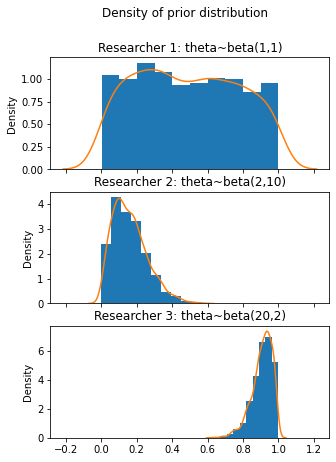

In [5]:
fig, ax = plt.subplots(3,1, figsize = (5,7), sharex = True)
fig.suptitle('Density of prior distribution')

for i in range(3):
    ax[i].hist(R[i], bins = int(size/100), density=True)
    sns.kdeplot(R[i], ax = ax[i])
    ax[i].set_title('Researcher {}: theta~beta({},{})'.format(i+1, pars[i][0], pars[i][1]))
    

In [6]:
most_prob = np.empty(3)
R_var = np.var(R, axis = 1)
E = np.array([pars[i][0]/(pars[i][0]+pars[i][1]) for i in range(3)])
for i in range(3):
    hist,bins = np.histogram(R[i], bins = int(size/200))
    argmax = np.argmax(hist)
    most_prob[i] = (bins[argmax] + bins[argmax+1])/2
    print('Researcher:', i)
    print('\t Most probability value:', most_prob[i])
    print('\t Expectation:', E[i])
    print('\t Variance:', R_var[i])
    print('\t 2.5% and 97.5% quantile intervals:', np.quantile(R[i], q=[0.25, 0.975]))

Researcher: 0
	 Most probability value: 0.3006521114413625
	 Expectation: 0.5
	 Variance: 0.08267406368079741
	 2.5% and 97.5% quantile intervals: [0.2404204  0.98289057]
Researcher: 1
	 Most probability value: 0.1693741506344008
	 Expectation: 0.16666666666666666
	 Variance: 0.00945956373226478
	 2.5% and 97.5% quantile intervals: [0.08858432 0.39541491]
Researcher: 2
	 Most probability value: 0.9619648430003747
	 Expectation: 0.9090909090909091
	 Variance: 0.0033688303145058447
	 2.5% and 97.5% quantile intervals: [0.87770533 0.98746774]


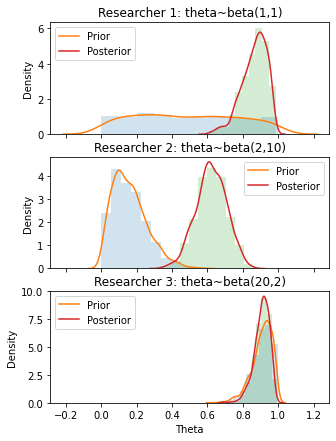

In [14]:
R_post = np.empty((3, size))
fig, ax = plt.subplots(3,1, figsize = (5,7), sharex = True)
# fig.suptitle('Density of prior and posterior distribution', fontsize = 14)

for i in range(3):
    R_post[i] = rng.beta(pars[i][0]+y, pars[i][1]+n-y, size=size)
    ax[i].hist(R[i], bins = int(size/100), density=True, alpha = 0.2)
    sns.kdeplot(R[i], ax = ax[i], label = 'Prior')
    ax[i].hist(R_post[i], bins = int(size/100), density=True, alpha = 0.2)
    sns.kdeplot(R_post[i], ax = ax[i], label = 'Posterior')
    ax[i].set_title('Researcher {}: theta~beta({},{})'.format(i+1, pars[i][0], pars[i][1]))
    ax[i].legend()
ax[2].set_xlabel('Theta')
plt.savefig('/nfs/scistore12/gaspgrp/emaksimo/courses/CompBayesStat/plots/Ex1_1_Fig1.png')

In [53]:
E

array([0.5       , 0.16666667, 0.90909091])